In [1]:
import gym
import os
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Environment initialization
env = gym.make('FrozenLake-v0')

[2018-04-22 09:21:36,731] Making new env: FrozenLake-v0


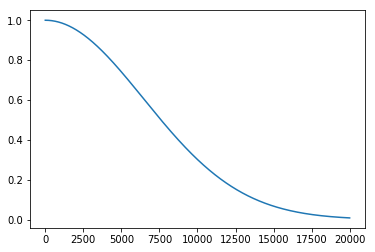

In [3]:
epsilon = 1.0
e_values= [1.0]
for i in range(20000):
    epsilon = epsilon * (np.exp(-.000000024 * i))
    e_values.append(epsilon)
plt.plot(e_values)

In [4]:
np.random.randn(1,4)

#np.random.randn(1, env.action_space.n) * (1 / float(episode + 1))

array([[ 1.21476352,  0.25454606,  0.43638173, -0.34905286]])

In [5]:
# Q and rewards
def run_Q(alpha = 0.75, discount = 0.99 , episodes = 10000, explore_scheme = "noise"):
    """
    schemes : "noise", "e-greedy", "random"
    
    """
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    iterations = []
    epsilon = 0.9
    decay_param = .000000024


    time1 = time.time()
    for episode in range(episodes):
        # Refresh state
        state = env.reset()
        done = False
        t_reward = 0
        max_steps = env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')

        # Run episode
        for i in range(max_steps):
            if done:
                break

            current = state
            
            ### explore scheme -- choose action
            
            if explore_scheme == "noise":
                action = np.argmax(Q[current,:] + np.random.randn(1, env.action_space.n) * (1 / float(episode + 1)))
            elif explore_scheme == "random":
                action = env.action_space.sample()

            elif explore_scheme == "e-greedy":
                #epsilon = self.epsilon * np.exp(-self.epsilon_decay_param * self.episode)

                if epsilon > 0.1:  #always explore 10% of the time.
                    epsilon = epsilon * np.exp(-decay_param*episode)
                
                if np.random.random() > epsilon:
                    action = np.argmax(Q[current,:])
                else:
                    action = env.action_space.sample()


            state, reward, done, info = env.step(action)
            t_reward += reward
            Q[current, action] += alpha * (reward + discount * np.max(Q[state,:]) - Q[current, action])

        rewards.append(t_reward)
        iterations.append(i)

    time2 = time.time()   
    print('with alpha: {}, gamma : {}, and episodes: {} and scheme: {}'.format(alpha,discount,episodes, explore_scheme ))
    print('took {:3f} ms'.format(float(time2-time1)*1000.0))

    
    policy = np.argmax(Q, axis=1)
    
    return (policy, rewards, episodes, epsilon)

In [6]:
def test_policy(policy, env_name = None, env = None):
    if env == None:
        problem = gym.make(env_name)
    else:
        from gym.wrappers.time_limit import TimeLimit
        problem = TimeLimit(env)
        
    done = False
    total_reward = 0
    num_steps = []
    for i in range(1000):
        state = problem.reset()
        done = False
        i = 0
        while not done:
            #print ("state is :{} ".format(state))
            #print (agent.Q[state])

            action = policy[state]
            #print ("action is :{}".format(action))

            state , reward, done, _ = problem.step(action)
            i +=1
            #problem.render()
        #problem.render()
        total_reward += reward
        num_steps.append(i)

    print ("Total Reward: {}".format(total_reward))
    print ("Average Steps: {}".format(np.mean(num_steps)))

In [7]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

def plot_rewards(episodes, rewards, params):
    a,d,e,ex = params    
    size = episodes // 50
    chunks = list(chunk_list(rewards, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(list(range(0, len(rewards), size)), averages)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Alpha : {}, Discount: {}, Episodes: {}, Explore: {}'.format(a,d,e,ex))
    plt.show()

with alpha: 0.75, gamma : 0.99, and episodes: 20000 and scheme: noise
took 64830.394983 ms


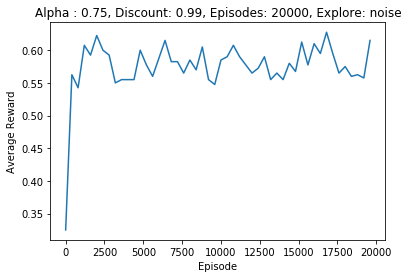

[2018-04-22 09:22:44,358] Making new env: FrozenLake-v0


policy is : [0 3 0 1 0 0 2 0 3 1 0 0 0 2 3 0]
Total Reward: 594.0
Average Steps: 43.626


In [8]:
params = {'alpha':0.75, 'discount' : 0.99 , 'episodes' : 20000, 'explore_scheme' : "noise"}
policy, rewards, episodes, epsilon = run_Q(**params)

prams = (params['alpha'], params['discount'], params['episodes'], params['explore_scheme'])
plot_rewards(episodes, rewards, prams)
print ("policy is : {}".format(policy))

test_policy(policy,'FrozenLake-v0' )

with alpha: 0.75, gamma : 0.99, and episodes: 20000 and scheme: random
took 7211.722851 ms


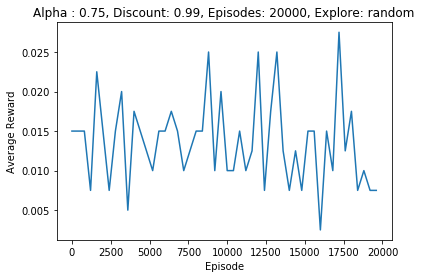

[2018-04-22 09:22:52,873] Making new env: FrozenLake-v0


policy is : [2 0 0 3 0 0 2 0 3 0 3 0 0 1 2 0]
Total Reward: 41.0
Average Steps: 10.94


In [9]:
params = {'alpha':0.75, 'discount' : 0.99 , 'episodes' : 20000, 'explore_scheme' : "random"}
policy, rewards, episodes, epsilon = run_Q(**params)

prams = (params['alpha'], params['discount'], params['episodes'], params['explore_scheme'])
plot_rewards(episodes, rewards, prams)
print ("policy is : {}".format(policy))

test_policy(policy,'FrozenLake-v0' )

with alpha: 0.75, gamma : 0.99, and episodes: 20000 and scheme: e-greedy
took 26245.408058 ms


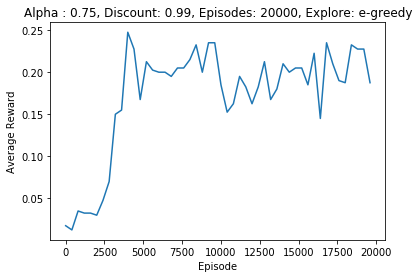

[2018-04-22 09:24:45,658] Making new env: FrozenLake-v0


policy is : [0 3 3 3 0 0 0 0 3 1 0 0 0 3 3 0]
Total Reward: 287.0
Average Steps: 38.673


In [12]:
params = {'alpha':0.75, 'discount' : 0.99 , 'episodes' : 20000, 'explore_scheme' : "e-greedy"}
policy, rewards, episodes, epsilon = run_Q(**params)

prams = (params['alpha'], params['discount'], params['episodes'], params['explore_scheme'])
plot_rewards(episodes, rewards, prams)
print ("policy is : {}".format(policy))

test_policy(policy,'FrozenLake-v0' )